In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re
from price_data_generator import DataGenerator

In [2]:
df = pd.read_csv('E:/bachelor/twitter_data_with_sentiment_no_na.csv')
df_without_dropped_na = pd.read_csv('E:/bachelor/twitter_data_with_sentiment.csv')

E:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df['date'] = pd.to_datetime(df.date)

In [4]:
candlesticks = DataGenerator('15m', '01/10/21', '30/10/21').data

In [5]:
candlesticks['date'] = pd.to_datetime(candlesticks.open_tstmp, unit='ms', utc=True)

In [6]:
df['label'] = df['label'].apply(lambda x: 1 if str(x) == 'POSITIVE' else -1)
df['bert_score'] = df['score'] * df['label']

In [8]:
df.label.value_counts()

-1    709448
 1    150690
Name: label, dtype: int64

In [9]:
df_without_dropped_na.label.value_counts()

NEGATIVE    1087429
POSITIVE     231704
Name: label, dtype: int64

In [10]:
df = pd.concat([df, pd.DataFrame([float(re.findall('(\d\.\d\d*)', row[1].vader)[3]) for row in df.iterrows()], columns=['vader_score'])], axis=1)

In [ ]:
agg_15m = df.groupby(pd.Grouper(key='date', freq='15Min')).aggregate(np.sum)

In [23]:
data_plot = agg_15m.merge(candlesticks, on='date')

In [25]:
data_plot.head()

,date,Unnamed: 0,replyCount,retweetCount,likeCount,quoteCount,label,score,bert_score,vader_score,...,high,low,close,vol,close_tstmp,quote_vol,trades,taker_base,taker_quote,excess_column
0,2021-10-01 00:00:00+00:00,149349242,514.0,932.0,7484.0,87.0,-295,392.776403,-291.500744,105.5509,...,44000.75000000,43713.38000000,43763.61000000,718.54824000,1633047299999,31535366.88173970,15820,324.65358000,14249036.02803010,0
1,2021-10-01 00:15:00+00:00,85128347,216.0,302.0,3749.0,16.0,-198,225.147797,-194.164383,63.3919,...,43899.79000000,43698.76000000,43872.99000000,302.68524000,1633048199999,13258017.18284540,8304,141.25418000,6187882.24035560,0
2,2021-10-01 00:30:00+00:00,108333445,277.0,264.0,3754.0,48.0,-223,285.931894,-219.009368,82.1685,...,44059.00000000,43840.30000000,43894.52000000,592.81108000,1633049099999,26043755.92503420,13044,284.86792000,12516091.25440530,0
3,2021-10-01 00:45:00+00:00,97142803,153.0,293.0,1130.0,16.0,-205,255.524214,-203.529996,76.1527,...,43898.52000000,43661.63000000,43694.48000000,387.51615000,1633049999999,16955390.46491600,9181,145.61491000,6371111.43610530,0
4,2021-10-01 01:00:00+00:00,102197407,307.0,247.0,1163.0,36.0,-211,271.042282,-208.567973,88.0455,...,43696.14000000,43417.61000000,43486.76000000,636.41675000,1633050899999,27697554.75591440,13627,271.29654000,11807864.05263370,0


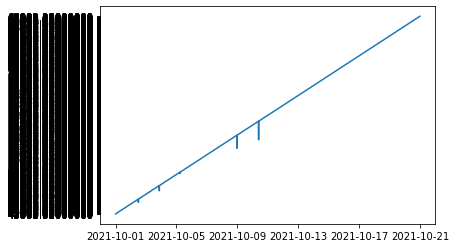

In [26]:
plt.plot(data_plot.date, data_plot.close)

In [36]:
df_without_dropped_na['date'] = pd.to_datetime(df_without_dropped_na.date)

In [40]:
df_without_dropped_na.sort_values('date')

,Unnamed: 0,date,content,replyCount,retweetCount,likeCount,quoteCount,processed_content,label,score,vader
370895,370895,2021-10-01 00:00:00+00:00,Current Price of Bitcoin:\n$43856 (5.3%)\n\n$B...,0.0,0.0,0.0,0.0,"['Current', 'Price', 'Bitcoin', 'BTC', 'Bitcoi...",NEGATIVE,0.991426,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
370896,370896,2021-10-01 00:00:00+00:00,Beach Pug Conditioning #art #artwork https://...,0.0,3.0,1.0,0.0,"['Beach', 'Pug', 'Conditioning', 'art', 'artwo...",NEGATIVE,0.997755,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
370894,370894,2021-10-01 00:00:00+00:00,#Cryptocurrencies Current Prices:\n\n#Bitcoin\...,0.0,1.0,0.0,0.0,"['Cryptocurrencies', 'Current', 'Prices', 'Bit...",NEGATIVE,0.997806,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
370892,370892,2021-10-01 00:00:00+00:00,$BNB/BTC 📈 Bullish MACD CrossOver Alert | Inte...,0.0,0.0,0.0,0.0,"['BNBBTC', 'Bullish', 'MACD', 'CrossOver', 'Al...",NEGATIVE,0.994323,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp..."
370893,370893,2021-10-01 00:00:00+00:00,🚀Peacock Burn 🔥🔥🔥\n\n👇\nhttps://t.co/IaNd6SLLZ...,1.0,1.0,3.0,0.0,"['', 'Peacock', 'Burn', 'Peacock', 'Peacock', ...",NEGATIVE,0.996422,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...,...,...,...,...,...
1319111,1319111,NaT,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE,0.506314,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1319120,1319120,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE,0.993511,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1319123,1319123,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE,0.995197,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1319127,1319127,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE,0.997313,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [41]:
test = df_without_dropped_na.dropna()

In [43]:
test.sort_values('date')

,Unnamed: 0,date,content,replyCount,retweetCount,likeCount,quoteCount,processed_content,label,score,vader
370895,370895,2021-10-01 00:00:00+00:00,Current Price of Bitcoin:\n$43856 (5.3%)\n\n$B...,0.0,0.0,0.0,0.0,"['Current', 'Price', 'Bitcoin', 'BTC', 'Bitcoi...",NEGATIVE,0.991426,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
370896,370896,2021-10-01 00:00:00+00:00,Beach Pug Conditioning #art #artwork https://...,0.0,3.0,1.0,0.0,"['Beach', 'Pug', 'Conditioning', 'art', 'artwo...",NEGATIVE,0.997755,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
370894,370894,2021-10-01 00:00:00+00:00,#Cryptocurrencies Current Prices:\n\n#Bitcoin\...,0.0,1.0,0.0,0.0,"['Cryptocurrencies', 'Current', 'Prices', 'Bit...",NEGATIVE,0.997806,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
370893,370893,2021-10-01 00:00:00+00:00,🚀Peacock Burn 🔥🔥🔥\n\n👇\nhttps://t.co/IaNd6SLLZ...,1.0,1.0,3.0,0.0,"['', 'Peacock', 'Burn', 'Peacock', 'Peacock', ...",NEGATIVE,0.996422,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
370892,370892,2021-10-01 00:00:00+00:00,$BNB/BTC 📈 Bullish MACD CrossOver Alert | Inte...,0.0,0.0,0.0,0.0,"['BNBBTC', 'Bullish', 'MACD', 'CrossOver', 'Al...",NEGATIVE,0.994323,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp..."
...,...,...,...,...,...,...,...,...,...,...,...
773950,773950,2021-10-20 23:59:42+00:00,@RealVisionBot @RaoulGMI @RealVision And where...,0.0,0.0,0.0,0.0,"['RealVisionBot', 'RaoulGMI', 'RealVision', 'A...",NEGATIVE,0.991286,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
773948,773948,2021-10-20 23:59:46+00:00,"cant wait for btc to hit 69,000",2.0,1.0,5.0,0.0,"['cant', 'wait', 'btc', 'hit', '']",NEGATIVE,0.982084,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
773945,773945,2021-10-20 23:59:48+00:00,@mrsubbbb Figure in 15 years BTC has 3 possibi...,0.0,1.0,4.0,1.0,"['mrsubbbb', 'Figure', 'year', 'BTC', 'possibi...",NEGATIVE,0.999416,"{'neg': 0.055, 'neu': 0.865, 'pos': 0.08, 'com..."
773946,773946,2021-10-20 23:59:48+00:00,@RitzyRhinozNFT Get rid of some Bills #BTC #AT...,0.0,0.0,0.0,0.0,"['RitzyRhinozNFT', 'Get', 'rid', 'Bills', 'BTC...",NEGATIVE,0.971805,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
